### 2.2 Question 2
To implement a linear regression model, we will be using a toy dataset to
ensure we’ve implemented the model correctly. To begin with this lab, we will
want to download the boston dataset from:

https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html.

Download and save the dataset
exactly as it is, and save it as a CSV.
After we’ve downloaded the CSV file, we will want to parse and load the
data into a pandas DataFrame.
Create a load_boston_data(filepath: str) -> pd.DataFrame function.
This may require iterating through each line in the file until you read the
data, at this point you will need to parse the data. Finally, return the data
as a dataframe.

In [1]:
import re
import pandas as pd

In [2]:
fileObject = open("data.txt", "r")
text = fileObject.read()

In [3]:
number_regex = re.compile(r'\d+\.*\d*')
vector = number_regex.findall(text)


In [4]:
data = len(vector) - 506*14
vector = vector[data:]
len(vector)/14

506.0

In [5]:
import numpy as np
arr = np.array(vector)
new_arr = arr.reshape(506, 14)
new_arr = new_arr.astype(np.float64)

In [6]:
variables = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD',
             'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.DataFrame(new_arr, columns = variables)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
predictors = ['CRIM','ZN','INDUS','CHAS','RM','AGE','DIS','RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

X = df[predictors]
y = df['MEDV']


### 2.3 Question 3
Visualise some scatter plots of the columns of your choice against the target
house price column (i.e. the column of your choice will be on the x-axis, will
house price will be the y-axis).
Decide what you think will be the singular best column to use for using
a linear model to predict the house price.
What is this column?

In [8]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


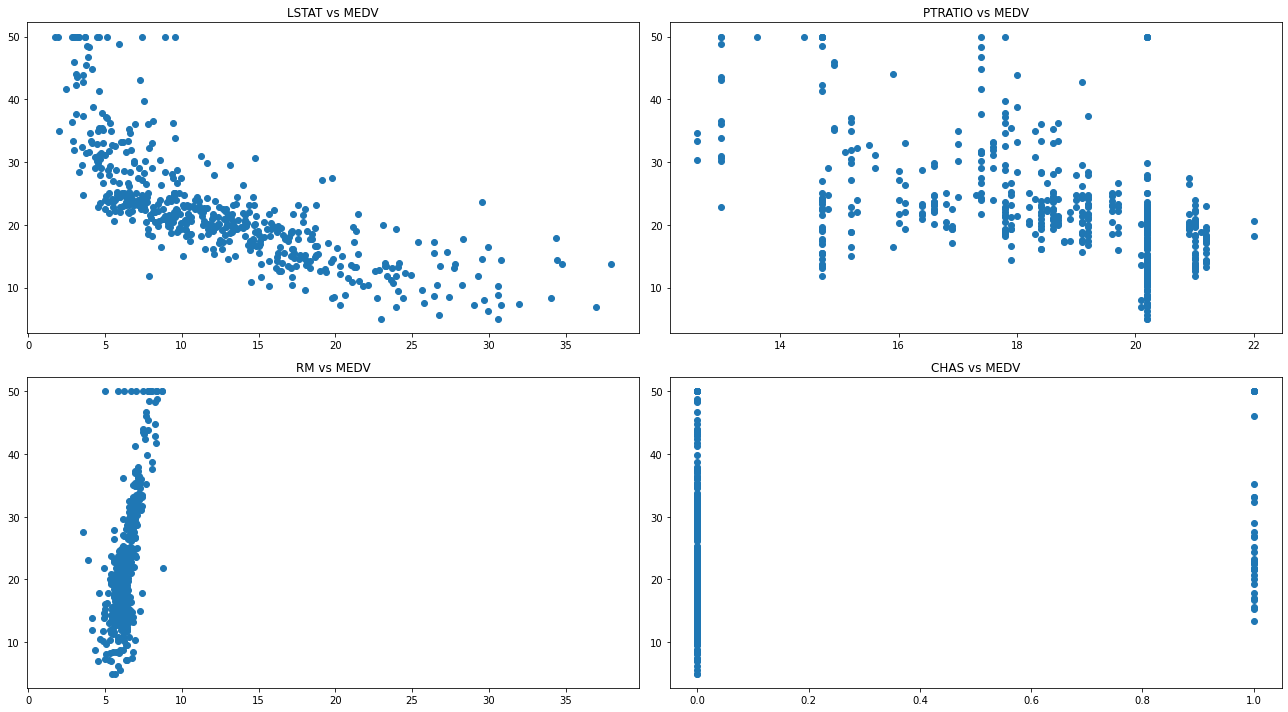

In [9]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(18, 10))

axs[0, 0].scatter(df['LSTAT'], y)
axs[0, 0].set_title("LSTAT vs MEDV")
axs[1, 0].scatter(df['RM'], y)
axs[1, 0].set_title("RM vs MEDV")
axs[1, 0].sharex(axs[0, 0])
axs[0, 1].scatter(df['PTRATIO'],y)
axs[0, 1].set_title("PTRATIO vs MEDV")
axs[1, 1].scatter(df['CHAS'], y)
axs[1, 1].set_title("CHAS vs MEDV")

fig.tight_layout()

### 2.4 Question 4
Create a function called lm, that takes an x, and y, and returns the random m and b variables in the linear equation

In [10]:
import random
random.seed(42)

def lm(x, y):
    # create random m, b
    
    m = random.random()
    b = random.random()
    return m, b

m, b = lm(X, y)

print('The random value assigned for m is {0} and for b is {1}'.format(m, b))

The random value assigned for m is 0.6394267984578837 and for b is 0.025010755222666936


### 2.5 Question 5
Using these m, b variables, create a housing price prediction for each row of
data.

In [11]:
for predictor in predictors:
    
    df['ypred_'+ predictor] = m * df[predictor] + b


df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,ypred_INDUS,ypred_CHAS,ypred_RM,ypred_AGE,ypred_DIS,ypred_RAD,ypred_TAX,ypred_PTRATIO,ypred_B,ypred_LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,1.502087,0.025011,4.229242,41.715638,2.640266,0.664438,189.295343,9.808241,253.813507,3.209356
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,4.545758,0.025011,4.130770,50.475785,3.201108,1.303864,154.766296,11.406808,253.813507,5.869372
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,4.545758,0.025011,4.619292,39.093988,3.201108,1.303864,154.766296,11.406808,251.211040,2.601901
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,1.418961,0.025011,4.499719,29.310758,3.901344,1.943291,141.977760,11.982292,252.362008,1.904926
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,1.418961,0.025011,4.594994,34.681943,3.901344,1.943291,141.977760,11.982292,253.813507,3.433156


### 2.6 Question 6
Create a function mae that calculate the mean absolute error of the true
house price value and the predicted value. What is the error?

In [12]:
def mae(y, y_pred):
    
    abs_difference = np.absolute(np.array(y) - np.array(y_pred))
    result = abs_difference.sum()/len(y)
    
    return result

mae_1 = mae(y, df['ypred_LSTAT'])
mae_1

15.843531297999794

### 2.7 Question 7
Visualise the linear model returned from lm on top of the scatter plot of the
input and target data.


Text(0, 0.5, 'Datos en y')

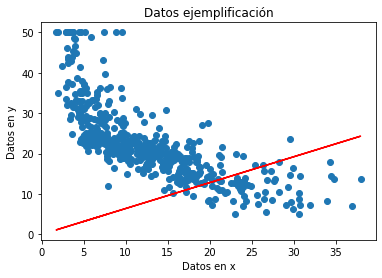

In [13]:
plt.scatter(df['LSTAT'],y)
linear_regression = b + m*df['LSTAT']
plt.plot(df['LSTAT'], linear_regression, color='r')
plt.title("Datos ejemplificación")
plt.xlabel("Datos en x")
plt.ylabel("Datos en y")

### 2.8 Question 8
Re-make the lm function. This time, when called with an x, y it returns
the optimal m and b.
You are free to either implement least-squares regression, or the gradient
descent method.

In [14]:
# def lm(x, y) -> tuple[float, float]:
def lm(x, y):
    
    x_mean = x.mean()
    y_mean = y.mean()

    Sxy = 0
    Sxx = 0

    for val in x:

        Sxx += (val-x_mean)**2

    for i,val in enumerate(x):

        Sxy += y[i]*(val-x_mean)

    B1 = Sxy/Sxx

    B0 = y_mean - B1*x_mean

    b = B0
    m = B1
    
    return m, b


### 2.9 Question 9
Re-plot this linear model against the scatter plot.

Text(0, 0.5, 'Datos en y')

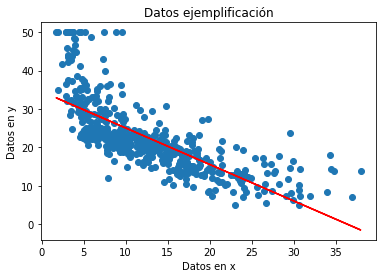

In [15]:
m, b = lm(df['LSTAT'], y)
plt.scatter(df['LSTAT'],y)
y_pred = list(b + m*df['LSTAT'])
plt.plot(df['LSTAT'], y_pred, color='r')
plt.title("Datos ejemplificación")
plt.xlabel("Datos en x")
plt.ylabel("Datos en y")

### 2.10 Question 10
Re-calculate the mean absolute error for these optimal m, b variables. What
is the error now?

In [17]:
mae_2 = mae(y, y_pred)
mae_2

4.505281166250568